In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None)

In [2]:
daly_df = pd.read_csv('dalys-rate-from-all-causes.csv')
population_df = pd.read_csv('population-by-country.csv')
population_2019_df = pd.read_csv('population_2019.csv')

print(daly_df.head(5))
print(population_df.head(5))
print(population_2019_df.head(5))

        Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate) (DALYs per 100,000)  
0                                      104103.069304                                                                   
1                                      101240.743988                                                                   
2                                       90918.470361                                                                   
3                                       88234.359675                                                                   
4                                       92997.694107                                                                   
        Entity Code  Year  Unnamed: 3
0  Afghanistan  AFG  1500   2000000.0
1  Afghanistan  AFG  1600   2

In [3]:
# select countries and not subregions from 2019
population_2019_df = population_2019_df.loc[population_2019_df['Type'] == 'Country']

#multiply the population value by a million to have similar units as the other dfs
population_2019_df['Data'] = population_2019_df['Data'] * 1e6
population_2019_df.head(5)

FIPS     Name     Type  TimeFrame        Data
3   DZ  Algeria  Country       2019  43406000.0
4   EG    Egypt  Country       2019  99064000.0
5   LY    Libya  Country       2019   6777000.0
6   MA  Morocco  Country       2019  35587000.0
7   SD    Sudan  Country       2019  42813000.0

In [4]:
# remove all population data points from before 1990
population_df = population_df.loc[population_df['Year'] >= 1990]
population_df.head(5)

Entity Code  Year  Unnamed: 3
16  Afghanistan  AFG  1990  14669339.0
17  Afghanistan  AFG  2000  23898198.0
35      Albania  ALB  1990   3250778.0
36      Albania  ALB  2000   3473835.0
56      Algeria  DZA  1990  25089000.0

In [5]:
# add population data from 2019 to the general population data. Remove code from both frames.
population_df = population_df.drop(columns=['Code'])
population_2019_df = population_2019_df.drop(columns=['FIPS', 'Type'])

In [6]:
population_df.columns = ['Country', 'Year', 'Population']
population_2019_df.columns = ['Country', 'Year', 'Population']

In [7]:
# merge the two frames
population_all_df = pd.concat([population_df, population_2019_df])
population_all_df.sort_values(['Country', 'Year'])

Country  Year    Population
16                         Afghanistan  1990  1.466934e+07
17                         Afghanistan  2000  2.389820e+07
136                        Afghanistan  2019  3.804200e+07
35                             Albania  1990  3.250778e+06
36                             Albania  2000  3.473835e+06
201                            Albania  2019  2.858000e+06
56                             Algeria  1990  2.508900e+07
57                             Algeria  2000  3.042900e+07
3                              Algeria  2019  4.340600e+07
67                             Andorra  1990  5.283700e+04
68                             Andorra  2000  6.682400e+04
202                            Andorra  2019  8.000000e+04
85                              Angola  1990  8.297000e+06
86                              Angola  2000  1.037700e+07
49                              Angola  2019  3.142700e+07
102                Antigua and Barbuda  1990  6.400000e+04
103                Antigua and Barbuda  2000  7.500000e+04
78                 Antigua and Barbuda  2019  9.700000e+04
128                          Argentina  1990  3.303600e+07
129                          Argentina  2000  3.733600e+07
96                           Argentina  2019  4.493900e+07
136                            Armenia  1990  3.376783e+06
137                            Armenia  2000  3.042556e+06
111                            Armenia  2019  2.962000e+06
159                          Australia  1990  1.695600e+07
160                          Australia  2000  1.905300e+07
217                          Australia  2019  2.530500e+07
184                            Austria  1990  7.722953e+06
185                            Austria  2000  8.113413e+06
180                            Austria  2019  8.877000e+06
192                         Azerbaijan  1990  7.199838e+06
193                         Azerbaijan  2000  7.809000e+06
112                         Azerbaijan  2019  1.002300e+07
210                            Bahamas  1990  2.572530e+05
211                            Bahamas  2000  2.900750e+05
79                             Bahamas  2019  3.890000e+05
223                            Bahrain  1990  5.004760e+05
224                            Bahrain  2000  6.341370e+05
113                            Bahrain  2019  1.505000e+06
236                         Bangladesh  1990  1.114370e+08
237                         Bangladesh  2000  1.366810e+08
137                         Bangladesh  2019  1.636670e+08
254                           Barbados  1990  2.620000e+05
255                           Barbados  2000  2.740000e+05
80                            Barbados  2019  2.870000e+05
262                            Belarus  1990  1.021521e+07
263                            Belarus  2000  1.036672e+07
190                            Belarus  2019  9.467000e+06
287                            Belgium  1990  9.969310e+06
288                            Belgium  2000  1.026362e+07
181                            Belgium  2019  1.145800e+07
304                             Belize  1990  1.908470e+05
305                             Belize  2000  2.478870e+05
69                              Belize  2019  4.080000e+05
322                              Benin  1990  4.705000e+06
323                              Benin  2000  6.619000e+06
11                               Benin  2019  1.180100e+07
334                             Bhutan  1990  6.150000e+05
335                             Bhutan  2000  6.060000e+05
138                             Bhutan  2019  7.520000e+05
356                            Bolivia  1990  6.573900e+06
357                            Bolivia  2000  8.195000e+06
97                             Bolivia  2019  1.147000e+07
368             Bosnia and Herzegovina  1990  4.423646e+06
369             Bosnia and Herzegovina  2000  4.035457e+06
203                 Bosnia-Herzegovina  2019  3.493000e+06
385                           Botswana  1990  1.265000e+06
386                

In [8]:
# prepare the daly dataframe

# drop all non-country entities
daly_df = daly_df.dropna()

# drop code column
daly_df = daly_df.drop(columns=['Code'])

# rename columns
daly_df.columns = ['Country', 'Year', 'DALYs per 100K']
daly_df

Country  Year  DALYs per 100K
0                          Afghanistan  1990   104103.069304
1                          Afghanistan  1991   101240.743988
2                          Afghanistan  1992    90918.470361
3                          Afghanistan  1993    88234.359675
4                          Afghanistan  1994    92997.694107
5                          Afghanistan  1995    91435.560056
6                          Afghanistan  1996    89343.793541
7                          Afghanistan  1997    89603.689033
8                          Afghanistan  1998    92889.311037
9                          Afghanistan  1999    88708.264474
10                         Afghanistan  2000    88007.270765
11                         Afghanistan  2001    87059.067776
12                         Afghanistan  2002    81936.163071
13                         Afghanistan  2003    79011.749389
14                         Afghanistan  2004    78126.901766
15                         Afghanistan  2005    75879.613801
16                         Afghanistan  2006    75742.319171
17                         Afghanistan  2007    74522.045699
18                         Afghanistan  2008    71463.853664
19                         Afghanistan  2009    69850.856332
20                         Afghanistan  2010    67908.008191
21                         Afghanistan  2011    65925.157147
22                         Afghanistan  2012    64673.316267
23                         Afghanistan  2013    62943.339932
24                         Afghanistan  2014    62991.423298
25                         Afghanistan  2015    63274.707758
26                         Afghanistan  2016    62958.587087
27                         Afghanistan  2017    56925.148424
28                             Albania  1990    31497.489460
29                             Albania  1991    31908.412596
30                             Albania  1992    31463.112584
31                             Albania  1993    30880.690945
32                             Albania  1994    30135.134012
33                             Albania  1995    29787.548849
34                             Albania  1996    29877.566151
35                             Albania  1997    33372.232781
36                             Albania  1998    28834.067298
37                             Albania  1999    29065.910934
38                             Albania  2000    29406.931545
39                             Albania  2001    28215.230037
40                             Albania  2002    27844.004124
41                             Albania  2003    27543.537496
42                             Albania  2004    27187.870377
43                             Albania  2005    26644.828418
44                             Albania  2006    26156.274777
45                             Albania  2007    25418.641453
46                             Albania  2008    25247.433351
47                             Albania  2009    24604.582848
48                             Albania  2010    24260.881841
49                             Albania  2011    24029.907268
50                             Albania  2012    23802.249948
51                             Albania  2013    23583.988697
52                             Albania  2014    23497.477077
53                             Albania  2015    23329.708495
54                             Albania  2016    23155.752663
55                             Albania  2017    23013.691488
56                             Algeria  1990    35991.605512
57                             Algeria  1991    35134.175887
58                             Algeria  1992    34538.394582
59                             Algeria  1993    34046.362784
60                             Algeria  1994    33996.243198
61                             Algeria  1995    33671.863047
62                             Algeria  1996    32826.868364
63                             Algeria  1997    33136.539160
64                             Algeria  1998    32528.411631
65   

In [9]:
"""
Bosnia-Herzegovina -> Bosnia and Herzegovina
China, Hong Kong SAR
China, Macao SAR
Congo, Dem. Rep. -> Democratic Republic of Congo
Curacao
Czechia -> Czech Republic
Federated States of Micronesia -> Micronesia (country)
French Guiana
French Polynesia
Guadeloupe
Guam
Indonesia
Korea, North -> North Korea
Korea, South -> South Korea
Kosovo
# missing macedonia 2019: North Macedonia -> Macedonia
Martinique
Mayotte
New Caledonia
Palestinian Territory -> Palestine
Puerto Rico
Reunion 
# missing Saint Kitts and Nevis: St. Kitts-Nevis
# missing Saint Vincent and the Grenadines: St. Vincent and the Grenadines
South Sudan
Sudan
# missing Swaziland: eSwatini
Taiwan
Timor-Leste -> Timor
Western Sahara
"""

'\nBosnia-Herzegovina -> Bosnia and Herzegovina\nChina, Hong Kong SAR\nChina, Macao SAR\nCongo, Dem. Rep. -> Democratic Republic of Congo\nCuracao\nCzechia -> Czech Republic\nFederated States of Micronesia -> Micronesia (country)\nFrench Guiana\nFrench Polynesia\nGuadeloupe\nGuam\nIndonesia\nKorea, North -> North Korea\nKorea, South -> South Korea\nKosovo\n# missing macedonia 2019: North Macedonia -> Macedonia\nMartinique\nMayotte\nNew Caledonia\nPalestinian Territory -> Palestine\nPuerto Rico\nReunion \n# missing Saint Kitts and Nevis: St. Kitts-Nevis\n# missing Saint Vincent and the Grenadines: St. Vincent and the Grenadines\nSouth Sudan\nSudan\n# missing Swaziland: eSwatini\nTaiwan\nTimor-Leste -> Timor\nWestern Sahara\n'

In [10]:
# apply all of the above:

population_all_df = population_all_df.replace('Bosnia-Herzegovina', 'Bosnia and Herzegovina')
population_all_df = population_all_df.replace('Congo, Dem. Rep.', 'Democratic Republic of Congo')
population_all_df = population_all_df.replace('Czechia', 'Czech Republic')
population_all_df = population_all_df.replace('Federated States of Micronesia', 'Micronesia (country)')
population_all_df = population_all_df.replace('Korea, North', 'North Korea')
population_all_df = population_all_df.replace('Korea, South', 'South Korea')
population_all_df = population_all_df.replace('North Macedonia', 'Macedonia')
population_all_df = population_all_df.replace('Palestinian Territory', 'Palestine')
population_all_df = population_all_df.replace('St. Kitts-Nevis', 'Saint Kitts and Nevis')
population_all_df = population_all_df.replace('St. Vincent and the Grenadines', 'Saint Vincent and the Grenadines')
population_all_df = population_all_df.replace('eSwatini', 'Swaziland')
population_all_df = population_all_df.replace('Timor-Leste', 'Timor')

population_all_df.sort_values(['Country', 'Year'])

Country  Year    Population
16                         Afghanistan  1990  1.466934e+07
17                         Afghanistan  2000  2.389820e+07
136                        Afghanistan  2019  3.804200e+07
35                             Albania  1990  3.250778e+06
36                             Albania  2000  3.473835e+06
201                            Albania  2019  2.858000e+06
56                             Algeria  1990  2.508900e+07
57                             Algeria  2000  3.042900e+07
3                              Algeria  2019  4.340600e+07
67                             Andorra  1990  5.283700e+04
68                             Andorra  2000  6.682400e+04
202                            Andorra  2019  8.000000e+04
85                              Angola  1990  8.297000e+06
86                              Angola  2000  1.037700e+07
49                              Angola  2019  3.142700e+07
102                Antigua and Barbuda  1990  6.400000e+04
103                Antigua and Barbuda  2000  7.500000e+04
78                 Antigua and Barbuda  2019  9.700000e+04
128                          Argentina  1990  3.303600e+07
129                          Argentina  2000  3.733600e+07
96                           Argentina  2019  4.493900e+07
136                            Armenia  1990  3.376783e+06
137                            Armenia  2000  3.042556e+06
111                            Armenia  2019  2.962000e+06
159                          Australia  1990  1.695600e+07
160                          Australia  2000  1.905300e+07
217                          Australia  2019  2.530500e+07
184                            Austria  1990  7.722953e+06
185                            Austria  2000  8.113413e+06
180                            Austria  2019  8.877000e+06
192                         Azerbaijan  1990  7.199838e+06
193                         Azerbaijan  2000  7.809000e+06
112                         Azerbaijan  2019  1.002300e+07
210                            Bahamas  1990  2.572530e+05
211                            Bahamas  2000  2.900750e+05
79                             Bahamas  2019  3.890000e+05
223                            Bahrain  1990  5.004760e+05
224                            Bahrain  2000  6.341370e+05
113                            Bahrain  2019  1.505000e+06
236                         Bangladesh  1990  1.114370e+08
237                         Bangladesh  2000  1.366810e+08
137                         Bangladesh  2019  1.636670e+08
254                           Barbados  1990  2.620000e+05
255                           Barbados  2000  2.740000e+05
80                            Barbados  2019  2.870000e+05
262                            Belarus  1990  1.021521e+07
263                            Belarus  2000  1.036672e+07
190                            Belarus  2019  9.467000e+06
287                            Belgium  1990  9.969310e+06
288                            Belgium  2000  1.026362e+07
181                            Belgium  2019  1.145800e+07
304                             Belize  1990  1.908470e+05
305                             Belize  2000  2.478870e+05
69                              Belize  2019  4.080000e+05
322                              Benin  1990  4.705000e+06
323                              Benin  2000  6.619000e+06
11                               Benin  2019  1.180100e+07
334                             Bhutan  1990  6.150000e+05
335                             Bhutan  2000  6.060000e+05
138                             Bhutan  2019  7.520000e+05
356                            Bolivia  1990  6.573900e+06
357                            Bolivia  2000  8.195000e+06
97                             Bolivia  2019  1.147000e+07
368             Bosnia and Herzegovina  1990  4.423646e+06
369             Bosnia and Herzegovina  2000  4.035457e+06
203             Bosnia and Herzegovina  2019  3.493000e+06
385                           Botswana  1990  1.265000e+06
386                

In [11]:
# remove all the countries that are not in both dataframes by now

daly_minus_pop = list(set(daly_df['Country'].unique()) - set(population_all_df['Country'].unique()))
pop_minus_daly = list(set(population_all_df['Country'].unique()) - set(daly_df['Country'].unique()))

daly_df = daly_df[~daly_df['Country'].isin(daly_minus_pop)]
population_all_df = population_all_df[~population_all_df['Country'].isin(pop_minus_daly)]

In [12]:
print(len(population_df['Country'].unique()))
print(len(population_2019_df['Country'].unique()))
print(len(population_all_df['Country'].unique()))
print(len(daly_df['Country'].unique()))
print(set(daly_df['Country'].unique()) - set(population_all_df['Country'].unique()))
print(set(population_all_df['Country'].unique())- set(daly_df['Country'].unique()))

190
209
190
190
set()
set()


In [13]:
# these countries only have values for 2019
"""
Guam
Indonesia
Palestine
Puerto Rico
South Sudan
Sudan
Taiwan
"""
# To get values for 1990 and 2000 we just take the population sum for 1990, 2000 and 2019 
# for all other countries and use the proportions to get estimates for the missing entries.

pop_total_1990 = population_all_df[population_all_df['Year'] == 1990]['Population'].sum()
pop_total_2000 = population_all_df[population_all_df['Year'] == 2000]['Population'].sum()

missing_countries = ['Guam', 'Indonesia', 'Palestine', 'Puerto Rico', 'South Sudan', 'Sudan', 'Taiwan']
pop_2019 = population_all_df[population_all_df['Year'] == 2019]
pop_2019_wo_missing = pop_2019[~pop_2019['Country'].isin(missing_countries)]
pop_total_2019_wo_missing = pop_2019_wo_missing['Population'].sum()

print("pop 1990: ", pop_total_1990)
print("pop 2000: ", pop_total_2000)
print("pop 2019 wo missing: ", pop_total_2019_wo_missing)

pop 1990:  5030276682.0
pop 2000:  5800197280.0
pop 2019 wo missing:  7322616000.0


In [14]:
ratio_1990_2000 = pop_total_1990/pop_total_2000
ratio_2000_2019 = pop_total_2000/pop_total_2019_wo_missing

for mc in missing_countries:
    
    mc_pop_2019 = pop_2019[pop_2019['Country'] == mc]['Population'].values[0]
    mc_pop_2000 = ratio_2000_2019 * mc_pop_2019
    mc_pop_1990 = ratio_1990_2000 * mc_pop_2000
    
    row_1990 = {'Country': mc, 'Year': 1990, 'Population': mc_pop_1990}
    row_2000 = {'Country': mc, 'Year': 2000, 'Population': mc_pop_2000}
    population_all_df = population_all_df.append(row_1990, ignore_index=True)
    population_all_df = population_all_df.append(row_2000, ignore_index=True)
    
population_all_df.sort_values(['Country', 'Year'])

Country  Year    Population
0                         Afghanistan  1990  1.466934e+07
1                         Afghanistan  2000  2.389820e+07
478                       Afghanistan  2019  3.804200e+07
2                             Albania  1990  3.250778e+06
3                             Albania  2000  3.473835e+06
531                           Albania  2019  2.858000e+06
4                             Algeria  1990  2.508900e+07
5                             Algeria  2000  3.042900e+07
366                           Algeria  2019  4.340600e+07
6                             Andorra  1990  5.283700e+04
7                             Andorra  2000  6.682400e+04
532                           Andorra  2019  8.000000e+04
8                              Angola  1990  8.297000e+06
9                              Angola  2000  1.037700e+07
406                            Angola  2019  3.142700e+07
10                Antigua and Barbuda  1990  6.400000e+04
11                Antigua and Barbuda  2000  7.500000e+04
430               Antigua and Barbuda  2019  9.700000e+04
12                          Argentina  1990  3.303600e+07
13                          Argentina  2000  3.733600e+07
443                         Argentina  2019  4.493900e+07
14                            Armenia  1990  3.376783e+06
15                            Armenia  2000  3.042556e+06
455                           Armenia  2019  2.962000e+06
16                          Australia  1990  1.695600e+07
17                          Australia  2000  1.905300e+07
544                         Australia  2019  2.530500e+07
18                            Austria  1990  7.722953e+06
19                            Austria  2000  8.113413e+06
514                           Austria  2019  8.877000e+06
20                         Azerbaijan  1990  7.199838e+06
21                         Azerbaijan  2000  7.809000e+06
456                        Azerbaijan  2019  1.002300e+07
22                            Bahamas  1990  2.572530e+05
23                            Bahamas  2000  2.900750e+05
431                           Bahamas  2019  3.890000e+05
24                            Bahrain  1990  5.004760e+05
25                            Bahrain  2000  6.341370e+05
457                           Bahrain  2019  1.505000e+06
26                         Bangladesh  1990  1.114370e+08
27                         Bangladesh  2000  1.366810e+08
479                        Bangladesh  2019  1.636670e+08
28                           Barbados  1990  2.620000e+05
29                           Barbados  2000  2.740000e+05
432                          Barbados  2019  2.870000e+05
30                            Belarus  1990  1.021521e+07
31                            Belarus  2000  1.036672e+07
521                           Belarus  2019  9.467000e+06
32                            Belgium  1990  9.969310e+06
33                            Belgium  2000  1.026362e+07
515                           Belgium  2019  1.145800e+07
34                             Belize  1990  1.908470e+05
35                             Belize  2000  2.478870e+05
422                            Belize  2019  4.080000e+05
36                              Benin  1990  4.705000e+06
37                              Benin  2000  6.619000e+06
372                             Benin  2019  1.180100e+07
38                             Bhutan  1990  6.150000e+05
39                             Bhutan  2000  6.060000e+05
480                            Bhutan  2019  7.520000e+05
40                            Bolivia  1990  6.573900e+06
41                            Bolivia  2000  8.195000e+06
444                           Bolivia  2019  1.147000e+07
42             Bosnia and Herzegovina  1990  4.423646e+06
43             Bosnia and Herzegovina  2000  4.035457e+06
533            Bosnia and Herzegovina  2019  3.493000e+06
44                           Botswana  1990  1.265000e+06
45                           Botswana  2000  1.680000e+06
415                         

# Interpolate values between 1990, 2000 and 2019

In [15]:
countries = list(population_all_df['Country'].unique())

for c in countries:
    
    c_pop_1990 = population_all_df[(population_all_df['Country'] == c) &\
                                   (population_all_df['Year'] == 1990)]['Population'].values[0]
    
    c_pop_2000 = population_all_df[(population_all_df['Country'] == c) &\
                                   (population_all_df['Year'] == 2000)]['Population'].values[0]
    
    c_pop_2019 = population_all_df[(population_all_df['Country'] == c) &\
                                   (population_all_df['Year'] == 2019)]['Population'].values[0]
    
    diff_2000_1990 = c_pop_2000 - c_pop_1990
    diff_2019_2000 = c_pop_2019 - c_pop_2000
    
    df_1991_to_1999 = pd.concat([pd.DataFrame({'Country':c, 'Year': y, \
                        'Population':(c_pop_1990 + (y-1990) * diff_2000_1990/10)}, \
                                              index=[0]) for y in range(1991,2000)])
    
    #print(df_1991_to_1999)
    #print(c_pop_2000)
    
    df_2001_to_2018 = pd.concat([pd.DataFrame({'Country':c, 'Year': y, \
                        'Population':(c_pop_2000 + (y-2000) * diff_2019_2000/19)}, \
                                              index=[0]) for y in range(2001,2019)])
    
    #print(df_2001_to_2018)
    #print(c_pop_2019)
    
    population_all_df = pd.concat([population_all_df, df_1991_to_1999, df_2001_to_2018])

In [16]:
population_all_df.sort_values(['Country', 'Year'])

Country  Year    Population
0                         Afghanistan  1990  1.466934e+07
0                         Afghanistan  1991  1.559222e+07
0                         Afghanistan  1992  1.651511e+07
0                         Afghanistan  1993  1.743800e+07
0                         Afghanistan  1994  1.836088e+07
0                         Afghanistan  1995  1.928377e+07
0                         Afghanistan  1996  2.020665e+07
0                         Afghanistan  1997  2.112954e+07
0                         Afghanistan  1998  2.205243e+07
0                         Afghanistan  1999  2.297531e+07
1                         Afghanistan  2000  2.389820e+07
0                         Afghanistan  2001  2.464261e+07
0                         Afghanistan  2002  2.538702e+07
0                         Afghanistan  2003  2.613143e+07
0                         Afghanistan  2004  2.687584e+07
0                         Afghanistan  2005  2.762025e+07
0                         Afghanistan  2006  2.836466e+07
0                         Afghanistan  2007  2.910907e+07
0                         Afghanistan  2008  2.985348e+07
0                         Afghanistan  2009  3.059789e+07
0                         Afghanistan  2010  3.134230e+07
0                         Afghanistan  2011  3.208671e+07
0                         Afghanistan  2012  3.283113e+07
0                         Afghanistan  2013  3.357554e+07
0                         Afghanistan  2014  3.431995e+07
0                         Afghanistan  2015  3.506436e+07
0                         Afghanistan  2016  3.580877e+07
0                         Afghanistan  2017  3.655318e+07
0                         Afghanistan  2018  3.729759e+07
478                       Afghanistan  2019  3.804200e+07
2                             Albania  1990  3.250778e+06
0                             Albania  1991  3.273084e+06
0                             Albania  1992  3.295389e+06
0                             Albania  1993  3.317695e+06
0                             Albania  1994  3.340001e+06
0                             Albania  1995  3.362306e+06
0                             Albania  1996  3.384612e+06
0                             Albania  1997  3.406918e+06
0                             Albania  1998  3.429224e+06
0                             Albania  1999  3.451529e+06
3                             Albania  2000  3.473835e+06
0                             Albania  2001  3.441423e+06
0                             Albania  2002  3.409010e+06
0                             Albania  2003  3.376598e+06
0                             Albania  2004  3.344186e+06
0                             Albania  2005  3.311773e+06
0                             Albania  2006  3.279361e+06
0                             Albania  2007  3.246948e+06
0                             Albania  2008  3.214536e+06
0                             Albania  2009  3.182124e+06
0                             Albania  2010  3.149711e+06
0                             Albania  2011  3.117299e+06
0                             Albania  2012  3.084887e+06
0                             Albania  2013  3.052474e+06
0                             Albania  2014  3.020062e+06
0                             Albania  2015  2.987649e+06
0                             Albania  2016  2.955237e+06
0                             Albania  2017  2.922825e+06
0                             Albania  2018  2.890412e+06
531                           Albania  2019  2.858000e+06
4                             Algeria  1990  2.508900e+07
0                             Algeria  1991  2.562300e+07
0                             Algeria  1992  2.615700e+07
0                             Algeria  1993  2.669100e+07
0                             Algeria  1994  2.722500e+07
0                             Algeria  1995  2.775900e+07
0                             Algeria  1996  2.829300e+07
0                             Algeria  1997  2.882700e+07
0                           

# Merge DALY and population data in one big DataFrame

In [17]:
#kick out row with years larger than 2017 from population data.
population_all_df = population_all_df.loc[population_all_df['Year'] <= 2017]

print(len(population_all_df))
print(len(daly_df))

5320
5320


In [18]:
result = pd.merge(population_all_df, daly_df, how='outer', on=['Country', 'Year'])
print(len(result))

result = result.sort_values(['Country', 'Year']).reset_index(drop=True)
result

5320


Country  Year    Population  DALYs per 100K
0                          Afghanistan  1990  1.466934e+07   104103.069304
1                          Afghanistan  1991  1.559222e+07   101240.743988
2                          Afghanistan  1992  1.651511e+07    90918.470361
3                          Afghanistan  1993  1.743800e+07    88234.359675
4                          Afghanistan  1994  1.836088e+07    92997.694107
5                          Afghanistan  1995  1.928377e+07    91435.560056
6                          Afghanistan  1996  2.020665e+07    89343.793541
7                          Afghanistan  1997  2.112954e+07    89603.689033
8                          Afghanistan  1998  2.205243e+07    92889.311037
9                          Afghanistan  1999  2.297531e+07    88708.264474
10                         Afghanistan  2000  2.389820e+07    88007.270765
11                         Afghanistan  2001  2.464261e+07    87059.067776
12                         Afghanistan  2002  2.538702e+07    81936.163071
13                         Afghanistan  2003  2.613143e+07    79011.749389
14                         Afghanistan  2004  2.687584e+07    78126.901766
15                         Afghanistan  2005  2.762025e+07    75879.613801
16                         Afghanistan  2006  2.836466e+07    75742.319171
17                         Afghanistan  2007  2.910907e+07    74522.045699
18                         Afghanistan  2008  2.985348e+07    71463.853664
19                         Afghanistan  2009  3.059789e+07    69850.856332
20                         Afghanistan  2010  3.134230e+07    67908.008191
21                         Afghanistan  2011  3.208671e+07    65925.157147
22                         Afghanistan  2012  3.283113e+07    64673.316267
23                         Afghanistan  2013  3.357554e+07    62943.339932
24                         Afghanistan  2014  3.431995e+07    62991.423298
25                         Afghanistan  2015  3.506436e+07    63274.707758
26                         Afghanistan  2016  3.580877e+07    62958.587087
27                         Afghanistan  2017  3.655318e+07    56925.148424
28                             Albania  1990  3.250778e+06    31497.489460
29                             Albania  1991  3.273084e+06    31908.412596
30                             Albania  1992  3.295389e+06    31463.112584
31                             Albania  1993  3.317695e+06    30880.690945
32                             Albania  1994  3.340001e+06    30135.134012
33                             Albania  1995  3.362306e+06    29787.548849
34                             Albania  1996  3.384612e+06    29877.566151
35                             Albania  1997  3.406918e+06    33372.232781
36                             Albania  1998  3.429224e+06    28834.067298
37                             Albania  1999  3.451529e+06    29065.910934
38                             Albania  2000  3.473835e+06    29406.931545
39                             Albania  2001  3.441423e+06    28215.230037
40                             Albania  2002  3.409010e+06    27844.004124
41                             Albania  2003  3.376598e+06    27543.537496
42                             Albania  2004  3.344186e+06    27187.870377
43                             Albania  2005  3.311773e+06    26644.828418
44                             Albania  2006  3.279361e+06    26156.274777
45                             Albania  2007  3.246948e+06    25418.641453
46                             Albania  2008  3.214536e+06    25247.433351
47                             Albania  2009  3.182124e+06    24604.582848
48                             Albania  2010  3.149711e+06    24260.881841
49                             Albania  2011  3.117299e+06    24029.907268
50                             Albania  2012  3.084887e+06    23802.249948
51                             Albania  2013  3.052474e+06    23583.988697
52                             Albania  2014  3.020062e+

In [19]:
result.sort_values(['DALYs per 100K'])

Country  Year    Population  DALYs per 100K
4227                         Singapore  2017  5.617974e+06    14901.234505
4226                         Singapore  2016  5.524961e+06    14982.392280
4225                         Singapore  2015  5.431948e+06    15163.525109
4224                         Singapore  2014  5.338935e+06    15366.079108
4223                         Singapore  2013  5.245922e+06    15629.450214
4222                         Singapore  2012  5.152909e+06    15908.820178
4221                         Singapore  2011  5.059896e+06    16100.099918
2379                             Japan  2017  1.261799e+08    16214.108085
2378                             Japan  2016  1.261798e+08    16224.624853
4220                         Singapore  2010  4.966883e+06    16232.876432
2377                             Japan  2015  1.261798e+08    16262.695426
2376                             Japan  2014  1.261797e+08    16473.109657
4219                         Singapore  2009  4.873870e+06    16479.172004
2375                             Japan  2013  1.261797e+08    16597.959183
2374                             Japan  2012  1.261796e+08    16760.773324
4218                         Singapore  2008  4.780857e+06    16989.942085
4451                             Spain  2017  4.633017e+07    17002.972011
2372                             Japan  2010  1.261795e+08    17011.791676
2323                             Italy  2017  6.006861e+07    17021.834744
4619                       Switzerland  2017  8.434623e+06    17047.954975
2371                             Japan  2009  1.261795e+08    17052.959452
4450                             Spain  2016  4.595875e+07    17086.535426
2322                             Italy  2016  5.993042e+07    17172.698233
4217                         Singapore  2007  4.687844e+06    17176.471954
4618                       Switzerland  2016  8.365935e+06    17178.428500
2370                             Japan  2008  1.261794e+08    17182.267322
4395                       South Korea  2017  5.131895e+07    17236.082307
4448                             Spain  2014  4.521592e+07    17266.624617
2369                             Japan  2007  1.261794e+08    17274.789502
4449                             Spain  2015  4.558733e+07    17284.568846
4394                       South Korea  2016  5.105542e+07    17314.296695
4447                             Spain  2013  4.484450e+07    17344.045320
2373                             Japan  2011  1.261796e+08    17364.119969
2368                             Japan  2006  1.261793e+08    17399.406896
2320                             Italy  2014  5.965404e+07    17432.292067
2321                             Italy  2015  5.979223e+07    17465.508633
4216                         Singapore  2006  4.594831e+06    17477.993559
2295                            Israel  2017  8.265947e+06    17481.909819
4617                       Switzerland  2015  8.297246e+06    17485.394463
4393                       South Korea  2015  5.079189e+07    17554.438823
2294                            Israel  2016  8.139421e+06    17598.540540
2367                             Japan  2005  1.261793e+08    17607.471272
4446                             Spain  2012  4.447308e+07    17614.829803
2366                             Japan  2004  1.261792e+08    17616.441447
4616                       Switzerland  2014  8.228558e+06    17629.613395
2126                           Iceland  2016  3.483752e+05    17646.520387
2127                           Iceland  2017  3.525835e+05    17664.748159
2123                           Iceland  2013  3.357504e+05    17668.922983
2319                             Italy  2013  5.951584e+07    17670.400692
2125                           Iceland  2015  3.441669e+05    17671.590155
2122                           Iceland  2012  3.315422e+05    17674.026569
2124                           Iceland  2014  3.399587e+05    17675.199007
2121                           Iceland  2011  3.273339e+

In [20]:
#save the resulting df
result.to_csv('DALY_pop_final.csv')

In [71]:
# add population growth from 1990-2017
df_growth = pd.DataFrame(columns=['Country', 'Population_growth_rel', 'Population_growth_abs'])

for c in countries:
    
    pop_2017 = result[(result['Country'] == c) & (result['Year'] == 2017)]['Population'].values[0]
    pop_1990 = result[(result['Country'] == c) & (result['Year'] == 1990)]['Population'].values[0]
    
    pop_rel_growth = (pop_2017 - pop_1990)/pop_1990
    pop_abs_growth = (pop_2017 - pop_1990)
    df_growth = df_growth.append({'Country':c, 'Population_growth_rel':pop_rel_growth,\
                                  'Population_growth_abs':pop_abs_growth}, ignore_index=True)

In [73]:
df_growth.sort_values('Population_growth_rel')

Country  Population_growth_rel  \
90                             Latvia              -0.263492   
62                            Georgia              -0.248254   
143                            Serbia              -0.221330   
95                          Lithuania              -0.220993   
25                           Bulgaria              -0.205783   
21             Bosnia and Herzegovina              -0.197472   
109                           Moldova              -0.173123   
171                           Ukraine              -0.171467   
55                            Estonia              -0.150298   
134                           Romania              -0.139053   
7                             Armenia              -0.120323   
1                             Albania              -0.100885   
41                            Croatia              -0.092249   
15                            Belarus              -0.063973   
73                            Hungary              -0.054301   
108              Micronesia (country)              -0.022241   
135                            Russia              -0.008408   
131                            Poland               0.008063   
82                              Japan               0.021390   
48                           Dominica               0.027068   
44                     Czech Republic               0.030884   
147                          Slovakia               0.035293   
132                          Portugal               0.035607   
70                             Guyana               0.038843   
138  Saint Vincent and the Grenadines               0.039054   
148                          Slovenia               0.044515   
63                            Germany               0.045649   
65                             Greece               0.054934   
80                              Italy               0.058610   
42                               Cuba               0.065428   
166               Trinidad and Tobago               0.076033   
111                        Montenegro               0.086434   
165                             Tonga               0.088748   
14                           Barbados               0.090197   
58                            Finland               0.099765   
84                         Kazakhstan               0.106407   
59                             France               0.107909   
97                          Macedonia               0.112797   
46                            Denmark               0.122030   
175                           Uruguay               0.125047   
16                            Belgium               0.136716   
54                            Eritrea               0.137885   
9                             Austria               0.139023   
173                    United Kingdom               0.149064   
117                       Netherlands               0.149367   
139                             Samoa               0.155753   
153                             Spain               0.177364   
106                         Mauritius               0.184161   
157                            Sweden               0.184386   
66                            Grenada               0.186789   
81                            Jamaica               0.188463   
162                          Thailand               0.193896   
152                       South Korea               0.197111   
19                             Bhutan               0.197775   
57                               Fiji               0.200110   
35                              China               0.218990   
92                            Lesotho               0.231261   
158                       Switzerland               0.233741   
104                  Marshall Islands               0.234687   
123                            Norway               0.238860   
156                         Swaziland               0.240592   
154                         Sri Lanka               0.246118  

In [74]:
df_growth.sort_values('Population_growth_abs')

Country  Population_growth_rel  \
171                           Ukraine              -0.171467   
134                           Romania              -0.139053   
143                            Serbia              -0.221330   
25                           Bulgaria              -0.205783   
62                            Georgia              -0.248254   
135                            Russia              -0.008408   
21             Bosnia and Herzegovina              -0.197472   
95                          Lithuania              -0.220993   
109                           Moldova              -0.173123   
90                             Latvia              -0.263492   
15                            Belarus              -0.063973   
73                            Hungary              -0.054301   
41                            Croatia              -0.092249   
7                             Armenia              -0.120323   
1                             Albania              -0.100885   
55                            Estonia              -0.150298   
108              Micronesia (country)              -0.022241   
48                           Dominica               0.027068   
138  Saint Vincent and the Grenadines               0.039054   
165                             Tonga               0.088748   
104                  Marshall Islands               0.234687   
66                            Grenada               0.186789   
144                        Seychelles               0.307675   
14                           Barbados               0.090197   
3                             Andorra               0.487841   
139                             Samoa               0.155753   
70                             Guyana               0.038843   
5                 Antigua and Barbuda               0.479441   
137                       Saint Lucia               0.283753   
86                           Kiribati               0.678351   
111                        Montenegro               0.086434   
189                              Guam               0.423850   
140             Sao Tome and Principe               0.683889   
148                          Slovenia               0.044515   
166               Trinidad and Tobago               0.076033   
74                            Iceland               0.384206   
11                            Bahamas               0.471652   
19                             Bhutan               0.197775   
103                             Malta               0.360083   
177                           Vanuatu               0.950856   
57                               Fiji               0.200110   
24                             Brunei               0.645309   
31                         Cape Verde               0.530135   
147                          Slovakia               0.035293   
155                          Suriname               0.478748   
106                         Mauritius               0.184161   
17                             Belize               1.049527   
97                          Macedonia               0.112797   
156                         Swaziland               0.240592   
96                         Luxembourg               0.569131   
101                          Maldives               1.351443   
131                            Poland               0.008063   
44                     Czech Republic               0.030884   
149                   Solomon Islands               1.016280   
132                          Portugal               0.035607   
175                           Uruguay               0.125047   
37                            Comoros               0.916898   
92                            Lesotho               0.231261   
54                            Eritrea               0.137885   
81                            Jamaica               0.188463   
58                            Finland               0.099765   
163                             Timor               0.665789  

In [21]:
def get_DALYs_per_100K(country):
    
    return(result[result['Country'] == country]['DALYs per 100K'].values)

get_DALYs_per_100K('Rwanda')

array([ 94419.49429726,  95401.88548269,  96730.95551917, 113083.34662588,
       724252.19782879, 118939.56937703, 109828.92108262, 113947.29676207,
       112441.46158637, 106767.33523823, 102497.79261773,  95610.34149831,
        88136.76077598,  81281.06427746,  75201.69033879,  69747.69828318,
        64669.32662455,  60291.09951705,  56457.84358906,  52944.23035664,
        49861.84656193,  47435.56370403,  45676.06991588,  44042.21681415,
        43033.78960442,  42154.83421316,  41264.14723279,  40388.0200842 ])

In [22]:
# get averages
DALY_averages_df = pd.concat([pd.DataFrame({'Country':c, 'DALY_average':get_DALYs_per_100K(c).mean()}, \
                                              index=[0]) for c in countries])

DALY_averages_df.sort_values('DALY_average')

Country   DALY_average
0                             Japan   17951.804359
0                         Singapore   18675.893993
0                           Andorra   19410.401604
0                           Iceland   19571.399919
0                            Sweden   20005.762522
0                             Spain   20006.081273
0                       Switzerland   20019.870115
0                             Italy   20046.487242
0                            France   20569.078983
0                            Israel   20744.130037
0                            Canada   20991.403675
0                         Australia   21040.473968
0                            Greece   21068.758124
0                             Malta   21080.657312
0                       Netherlands   21198.238470
0                           Austria   21571.018078
0                            Norway   21571.510053
0                           Germany   21680.607338
0                            Cyprus   21916.879263
0                            Kuwait   21996.821652
0                        Costa Rica   22156.453533
0                            Taiwan   22220.926755
0                    United Kingdom   22285.243426
0                           Belgium   22350.865226
0                        Luxembourg   22351.880050
0                           Ireland   22368.227706
0                           Denmark   22663.797469
0                       South Korea   22735.758594
0                           Finland   22746.594978
0                              Cuba   23026.300818
0                       New Zealand   23341.146735
0                          Portugal   23384.828374
0                          Slovenia   24403.234701
0                             Chile   24640.489792
0                       Puerto Rico   24858.417246
0                            Panama   24983.921618
0                     United States   25282.961380
0                    Czech Republic   25625.475087
0                          Barbados   25698.879133
0                           Croatia   26291.159009
0               Antigua and Barbuda   26396.830462
0                        Montenegro   26648.690557
0                           Uruguay   26770.069200
0                           Albania   27277.327054
0                           Jamaica   27413.695111
0                            Brunei   27702.352043
0                          Malaysia   27707.419474
0                         Macedonia   27777.624793
0                            Poland   27786.584012
0                         Argentina   27810.707473
0                           Lebanon   27926.340025
0                          Colombia   27935.437998
0                             Qatar   27973.903030
0                          Slovakia   28048.592538
0            Bosnia and Herzegovina   28200.339728
0                            Mexico   28200.420712
0                           Bahrain   28238.202967
0                           Tunisia   28369.620331
0                         Nicaragua   28708.343902
0                              Guam   28808.971451
0                          Maldives   29001.518478
0                          Paraguay   29141.397934
0                       Saint Lucia   29249.020031
0                              Peru   29255.213042
0                           Grenada   29387.685075
0                         Venezuela   29484.478407
0                      Saudi Arabia   29667.653257
0                         Sri Lanka   29751.366088
0                           Ecuador   29767.181702
0                          Thailand   29800.319594
0                           Algeria   29845.466137
0                          Dominica   29917.772499
0                             China   29937.903939
0                              Oman   30264.503636
0                            Serbia   30311.217969
0                        Seychelles   30379.819852
0                          Bulgaria   30437.107744
0                            Jordan   30456.307245

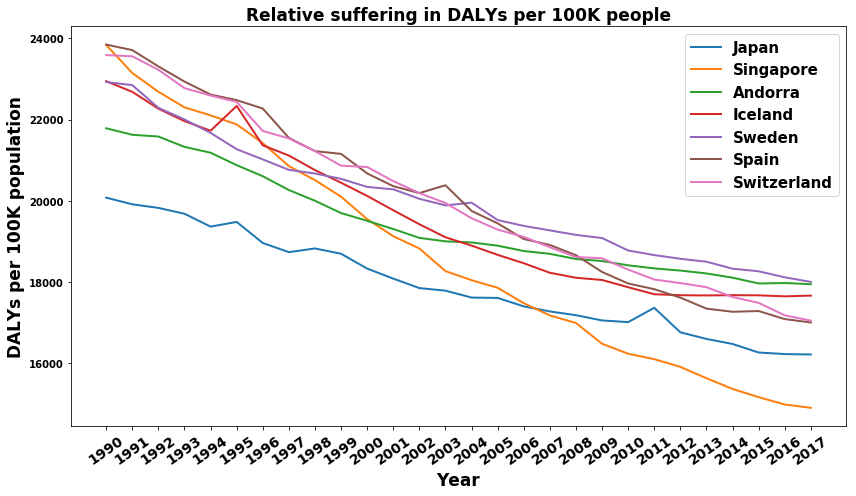

In [23]:
#low suffering selection

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.labelsize'] = 14

low_DALY_countries = ['Japan', 'Singapore', 'Andorra', 'Iceland', 'Sweden', 'Spain', 'Switzerland']


x_labels = [str(y) for y in range(1990, 2018)]
fig = plt.figure(figsize=(12, 7))

for c in low_DALY_countries:
    
    DALYs = get_DALYs_per_100K(c)
    plt.plot(x_labels, DALYs, label=c, lw=2)
    
plt.title('Relative suffering in DALYs per 100K people', fontdict={'fontsize':17, 'fontweight':'bold'})
plt.ylabel('DALYs per 100K population', fontdict={'fontsize':17})
plt.xlabel('Year', fontdict={'fontsize':17})
plt.legend(prop={'size': 15})

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=35)

plt.tight_layout()
plt.savefig('relative_suffering_good_countries.png')
plt.show();

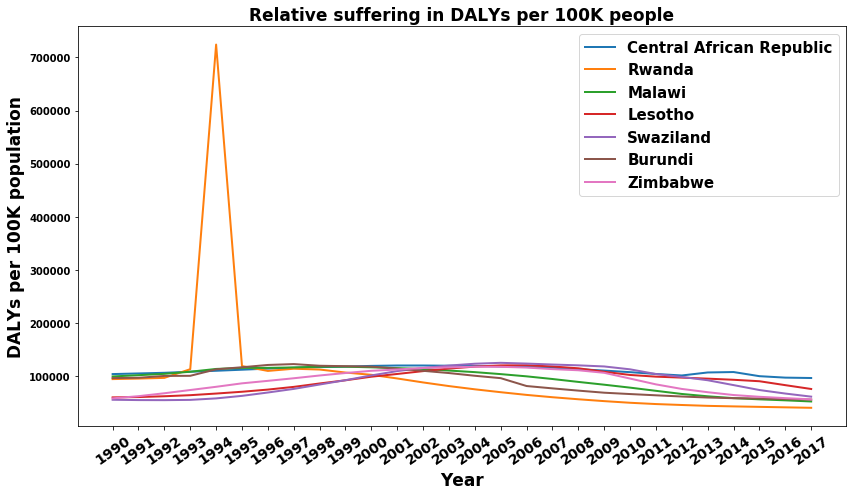

In [32]:
#high suffering selection

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.labelsize'] = 14

high_DALY_countries = ['Central African Republic', 'Rwanda', 'Malawi', 'Lesotho', 'Swaziland', 'Burundi', 'Zimbabwe']
high_DALY_countries_wo_rwanda = ['Central African Republic', 'Malawi', 'Lesotho', 'Swaziland', 'Burundi', 'Zimbabwe']


x_labels = [str(y) for y in range(1990, 2018)]
fig = plt.figure(figsize=(12, 7))

for c in high_DALY_countries:
    
    DALYs = get_DALYs_per_100K(c)
    plt.plot(x_labels, DALYs, label=c, lw=2)
    
plt.title('Relative suffering in DALYs per 100K people', fontdict={'fontsize':17, 'fontweight':'bold'})
plt.ylabel('DALYs per 100K population', fontdict={'fontsize':17})
plt.xlabel('Year', fontdict={'fontsize':17})
plt.legend(prop={'size': 15})

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=35)

plt.tight_layout()
plt.savefig('relative_suffering_bad_countries_w_rwanda.png')
plt.show();

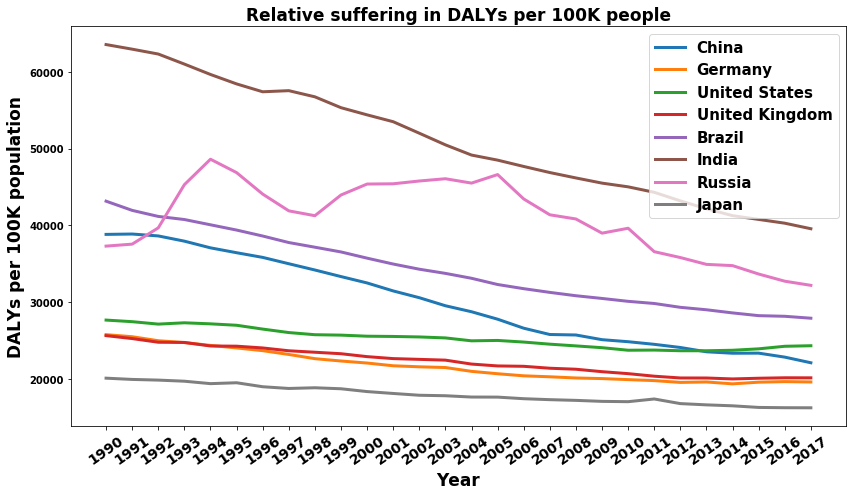

In [33]:
# selected countries DALYs per 100K

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.labelsize'] = 14

selected_DALY_countries = ['China', 'Germany', 'United States',\
                           'United Kingdom', 'Brazil', 'India', 'Russia', 'Japan']


x_labels = [str(y) for y in range(1990, 2018)]
fig = plt.figure(figsize=(12, 7))

for c in selected_DALY_countries:
    
    DALYs = get_DALYs_per_100K(c)
    plt.plot(x_labels, DALYs, label=c, lw=3)
    
plt.title('Relative suffering in DALYs per 100K people', fontdict={'fontsize':17, 'fontweight':'bold'})
plt.ylabel('DALYs per 100K population', fontdict={'fontsize':17})
plt.xlabel('Year', fontdict={'fontsize':17})
plt.legend(prop={'size': 15})

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=35)

plt.tight_layout()
plt.savefig('relative_suffering_selected_countries.png')
plt.show();

## absolute amount of suffering

In [26]:
def get_DALYs_absolute(country):
    
    DALYs = result[result['Country'] == country]['DALYs per 100K'].values * 1e-5
    population = result[result['Country'] == country]['Population'].values 
    return(DALYs * population)

get_DALYs_absolute('Rwanda')

array([ 6592369.09183497,  6784600.48798727,  7004481.95105432,
        8335147.31310063, 54321811.84595072,  9075089.14346714,
        8522284.96032723,  8989530.13615293,  9016455.92168812,
        8699829.54455177,  8484767.2728957 ,  8133471.10879661,
        7699441.87031426,  7286590.7354289 ,  6913726.77105256,
        6571958.51607551,  6241474.96794955,  5956919.29307251,
        5707412.55238171,  5473402.39965344,  5268875.08312241,
        5121068.55922888,  5035666.50804173,  4956348.81946588,
        4941366.21600912,  4936930.1287421 ,  4927069.4874286 ,
        4914903.1914574 ])

In [27]:
# get averages
DALY_absolutes_means_df = pd.concat([pd.DataFrame({'Country':c, 'DALY_absolute_average':get_DALYs_absolute(c).mean()}, \
                                              index=[0]) for c in countries])

DALY_absolutes_means_df.sort_values('DALY_absolute_average')

Country  DALY_absolute_average
0                           Andorra           1.308063e+04
0               Antigua and Barbuda           2.076583e+04
0                          Dominica           2.127177e+04
0                        Seychelles           2.524994e+04
0                  Marshall Islands           2.747200e+04
0                           Grenada           2.825705e+04
0                             Tonga           3.392414e+04
0  Saint Vincent and the Grenadines           3.499327e+04
0                              Guam           4.175059e+04
0                       Saint Lucia           4.588391e+04
0              Micronesia (country)           4.792923e+04
0                           Iceland           5.797801e+04
0                          Kiribati           5.799086e+04
0                             Samoa           6.144856e+04
0                          Barbados           7.066828e+04
0             Sao Tome and Principe           7.448485e+04
0                             Malta           8.702611e+04
0                            Belize           9.057287e+04
0                            Brunei           9.321455e+04
0                          Maldives           9.442970e+04
0                           Bahamas           9.651103e+04
0                        Luxembourg           1.055991e+05
0                           Vanuatu           1.098302e+05
0                        Cape Verde           1.498161e+05
0                          Suriname           1.730054e+05
0                        Montenegro           1.790533e+05
0                            Cyprus           1.901172e+05
0                           Bahrain           2.276793e+05
0                   Solomon Islands           2.503167e+05
0                            Bhutan           2.769651e+05
0                          Djibouti           2.939460e+05
0                             Qatar           3.086860e+05
0                           Comoros           3.154270e+05
0                            Guyana           3.189178e+05
0                              Fiji           3.553626e+05
0                         Mauritius           3.642844e+05
0               Trinidad and Tobago           4.210176e+05
0                             Timor           4.350936e+05
0                           Estonia           4.439078e+05
0                 Equatorial Guinea           4.534288e+05
0                          Slovenia           4.942784e+05
0                         Macedonia           5.544810e+05
0                            Kuwait           5.709803e+05
0                       Puerto Rico           6.252071e+05
0                           Jamaica           7.177486e+05
0                            Panama           7.882340e+05
0                            Latvia           7.910553e+05
0                         Singapore           7.916604e+05
0                             Gabon           8.125000e+05
0                            Gambia           8.579869e+05
0                        Costa Rica           8.700898e+05
0                              Oman           8.772819e+05
0                           Albania           8.910708e+05
0                           Uruguay           8.918833e+05
0                           Ireland           8.991180e+05
0                       New Zealand           9.388031e+05
0                           Armenia           9.567742e+05
0                         Swaziland           9.743265e+05
0                            Norway           1.005651e+06
0                         Lithuania           1.115455e+06
0                     Guinea-Bissau           1.125726e+06
0            Bosnia and Herzegovina           1.126156e+06
0                          Botswana           1.139544e+06
0                           Croatia           1.141615e+06
0                           Finland           1.187412e+06
0                           Lebanon           1.208118e+06
0                           Denmark           1.227910e+06
0               

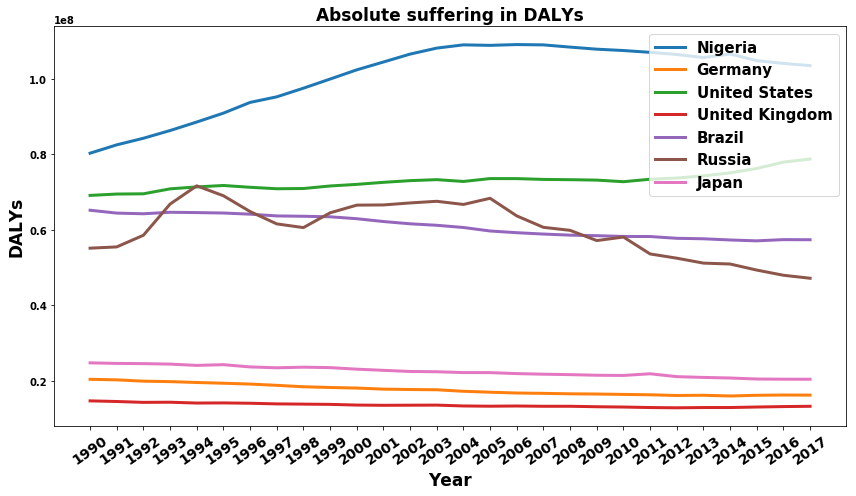

In [85]:
# selected countries DALYs per 100K

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.labelsize'] = 14

selected_DALY_countries = ['China', 'Germany', 'United States',\
                           'United Kingdom', 'Brazil', 'India', 'Russia', 'Japan']

selected_DALY_countries_wo_CN_IN = ['Germany', 'United States',\
                           'United Kingdom', 'Brazil', 'Russia', 'Japan']

selected_DALY_countries_wo_CN_IN_w_NI = ['Nigeria', 'Germany', 'United States',\
                           'United Kingdom', 'Brazil', 'Russia', 'Japan']


x_labels = [str(y) for y in range(1990, 2018)]
fig = plt.figure(figsize=(12, 7))

for c in selected_DALY_countries_wo_CN_IN_w_NI:
    
    DALYs = get_DALYs_absolute(c)
    plt.plot(x_labels, DALYs, label=c, lw=3)
    
plt.title('Absolute suffering in DALYs', fontdict={'fontsize':17, 'fontweight':'bold'})
plt.ylabel('DALYs', fontdict={'fontsize':17})
plt.xlabel('Year', fontdict={'fontsize':17})
plt.legend(prop={'size': 15})

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=35)

plt.tight_layout()
plt.savefig('absolute_suffering_selected_countries_wo_CN_IN_w_NI.png')
plt.show();

In [29]:
## the big comparison

pop_world = []
DALYs_abs_world = []
DALYs_rel_world = []

for y in range(1990, 2018):
    
    population = result[result['Year'] == y]['Population'].values
    DALYs_rel = result[result['Year'] == y]['DALYs per 100K'].values * 1e-5
    DALYs_abs = (population * DALYs_rel).sum()
    pop_sum = population.sum()
    DALYs_rel = DALYs_abs/pop_sum
    
    pop_world.append(pop_sum)
    DALYs_abs_world.append(DALYs_abs)
    DALYs_rel_world.append(DALYs_rel)
    
pop_world = np.array(pop_world)
DALYs_abs_world = np.array(DALYs_abs_world)
DALYs_rel_world = np.array(DALYs_rel_world)

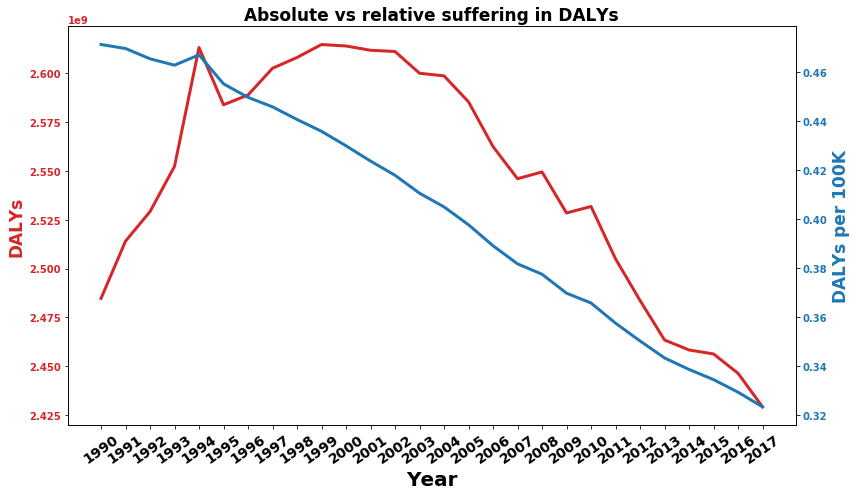

In [56]:
# selected countries DALYs per 100K

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.labelsize'] = 14

x_labels = [str(y) for y in range(1990, 2018)]

fig, ax1 = plt.subplots(figsize=(12,7))

color1 = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('DALYs', color=color1, fontsize=17)
ax1.tick_params(axis='y', labelcolor=color1)

#plt.plot(x_labels, pop_world, label='population growth (approximation)', lw=3)
ax1.plot(x_labels, DALYs_abs_world, label='DALYs absolute', lw=3, color=color1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'

ax2.plot(x_labels, DALYs_rel_world, label='DALYs relative', lw=3, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylabel('DALYs per 100K', color=color2, fontsize=17)  # we already handled the x-label with ax1

plt.title('Absolute vs relative suffering in DALYs', fontdict={'fontsize':17, 'fontweight':'bold'})
#plt.ylabel('DALYs per', fontdict={'fontsize':17})
#plt.xlabel('Year', fontdict={'fontsize':17})
#plt.legend(prop={'size': 15})

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=35)

plt.tight_layout()
plt.savefig('abs_vs_rel_suffering_world.png')
plt.show()

In [77]:
def get_pop(country):
    
    population = result[result['Country'] == country]['Population'].values 
    return(population)

get_pop('China')

array([1.13518500e+09, 1.14793100e+09, 1.16067700e+09, 1.17342300e+09,
       1.18616900e+09, 1.19891500e+09, 1.21166100e+09, 1.22440700e+09,
       1.23715300e+09, 1.24989900e+09, 1.26264500e+09, 1.26977053e+09,
       1.27689605e+09, 1.28402158e+09, 1.29114711e+09, 1.29827263e+09,
       1.30539816e+09, 1.31252368e+09, 1.31964921e+09, 1.32677474e+09,
       1.33390026e+09, 1.34102579e+09, 1.34815132e+09, 1.35527684e+09,
       1.36240237e+09, 1.36952789e+09, 1.37665342e+09, 1.38377895e+09])

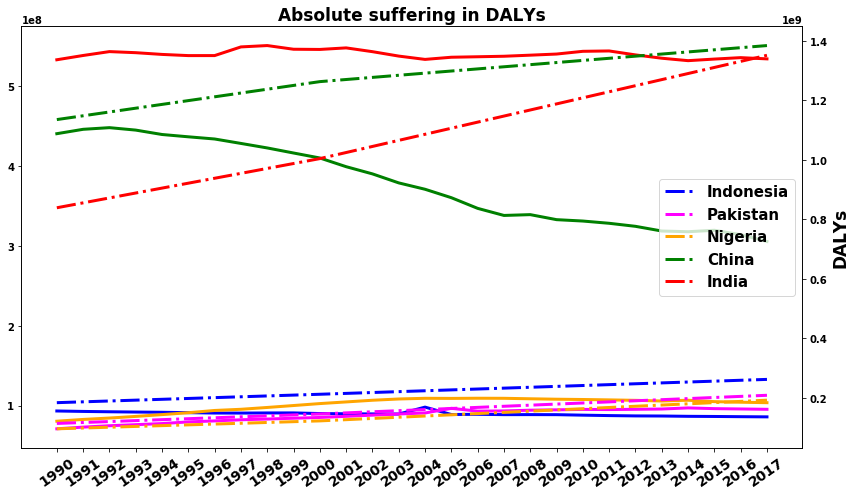

In [83]:
# high absolute population growth countries

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.labelsize'] = 14


high_abs_pop_growth_countries = ['Indonesia', 'Pakistan', 'Nigeria', 'China', 'India']

colors =['blue', 'magenta', 'orange', 'green', 'red', 'cyan', 'yellow', 'black']

x_labels = [str(y) for y in range(1990, 2018)]

fig, ax1 = plt.subplots(figsize=(12,7))

ax2 = ax1.twinx()  

for i, c in enumerate(high_abs_pop_growth_countries):
    
    color = colors[i]
    DALYs = get_DALYs_absolute(c)
    pop = get_pop(c)
    ax1.plot(x_labels, DALYs, label=c, lw=3, color=color)
    ax2.plot(x_labels, pop, '-.', label=c, lw=3, color=color)
    
plt.title('Absolute suffering in DALYs', fontdict={'fontsize':17, 'fontweight':'bold'})
plt.ylabel('DALYs', fontdict={'fontsize':17})
plt.xlabel('Year', fontdict={'fontsize':17})
plt.legend(prop={'size': 15})

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=35)

plt.tight_layout()
#plt.savefig('absolute_suffering_selected_countries_wo_CN_IN.png')
plt.show();